# The 8 queen problem 
### Réalisé par :
#### Imane Sidki


#### Le probleme est de placer 8 reines dans un échiquier de 8x8 cases, de telle façon que chaque deux reines ne se croisent jamais, en utilisant l'algorithme heuristique.

#### Etape 1 (Initialisation): Créer une population initiale de solutions aléatoires.

In [7]:
import numpy as np 
import math as m

def initialize(pop_size) :
    return np.random.randint(8, size=(pop_size, 8))

La fonction np.random.randint(8, size=(pop_size, 8)) crée une matrice de taille pop_size par 8, où chaque élément est un nombre entier aléatoire entre 0 et 7 inclus. Chaque élément de la matrice représente la position d'une reine dans une rangée donnée de l'échiquier.

In [8]:
population_initiale = initialize(5)
print(population_initiale)

[[3 4 1 7 1 4 7 3]
 [5 1 0 7 0 1 5 7]
 [4 2 0 3 2 5 5 2]
 [6 7 4 5 2 5 3 0]
 [5 0 1 4 3 7 1 2]]


### Etape 2 (Evaluation) : fonction de fitness
##### Évaluer la qualité de chaque solution dans la population en utilisant une fonction de fitness qui mesure à quel point chaque solution est proche de la solution optimale.

In [9]:
def fitness(population):
    # Crée une liste vide pour stocker les scores de fitness
    fitness_vals = []
    # Pour chaque solution dans la population
    for x in population:
        # Initialise la variable penalty à zéro pour stocker les pénalités de cette solution
        penalty = 0
        # Pour chaque reine i dans la solution
        for i in range(8):
            # Récupère la colonne de la reine i
            r = x[i]
            # Pour chaque autre reine j dans la solution
            for j in range(8):
                # Si i et j sont dans la même colonne, passer à la reine suivante
                if i == j:
                    continue
                # Calculer la distance verticale ou diagonale entre les reines i et j
                d = abs(i-j)
                # Si la reine j est dans la même colonne ou sur une diagonale avec la reine i, ajouter une pénalité
                if x[j] in [r, r-d, r+d]:
                    penalty += 1
        # Ajouter le score de fitness de cette solution à la liste des scores de fitness
        fitness_vals.append(penalty)
    # Retourne les scores de fitness inversés en signe, pour que l'algorithme cherche à les maximiser
    return (-1 * np.array(fitness_vals))


In [10]:
fitness_valeurs = fitness(population_initiale)
print(fitness_valeurs)

[-18 -14 -14 -14 -16]


### Etape 3 (Sélection) :
##### Sélectionner les solutions les plus performantes (celles avec les meilleurs scores de fitness) pour la reproduction. 

In [11]:
def selection(pop, fitness_valeurs):
    # Crée une copie de la liste des scores de fitness
    scores = fitness_valeurs.copy()
    # Ajoute 1 au score de fitness minimum pour éviter les divisions par zéro
    scores += abs(scores.min()) + 1
    # Normalise les scores de fitness pour obtenir des probabilités
    probs = scores / scores.sum()
    # Récupère le nombre de solutions dans la population
    N = len(pop)
    # Crée un tableau d'indices de solutions
    indices = np.arange(N)
    # Sélectionne des solutions aléatoirement en utilisant les probabilités normalisées comme poids
    selected_indices = np.random.choice(indices, size=N, p=probs)
    # Sélectionne les solutions correspondantes à ces indices
    #les solutions ayant un score de fitness plus élevé ont une plus grande chance d'être sélectionnées pour la reproduction.
    selected_population = pop[selected_indices]
    # Retourne les solutions sélectionnées
    return selected_population


In [12]:
population_selectionnee = selection(population_initiale,fitness_valeurs)
print(population_selectionnee)

[[4 2 0 3 2 5 5 2]
 [5 1 0 7 0 1 5 7]
 [5 0 1 4 3 7 1 2]
 [6 7 4 5 2 5 3 0]
 [5 0 1 4 3 7 1 2]]


### Etape 4 (crossover) : 
##### Reproduction:Créer une nouvelle génération de solutions en croisant les solutions sélectionnées et en introduisant des mutations pour explorer de nouvelles zones de l'espace de recherche.


In [13]:
def crossover(parent1,parent2,tc): #tc : taux de crossover
    r=np.random.random() # r nombre aleatoire entre 0 et 1
    if r<tc: #alors il y aura un crossover
        m=np.random.randint(1,8) #la première position est exclue car elle ne permettrait pas de croiser les deux parents
        #child1 est créé en prenant les premiers m éléments de parent1 et les derniers éléments de parent2. 
        child1 = np.concatenate([parent1[:m],parent2[m:]])
        child2 = np.concatenate([parent2[:m],parent1[m:]])
    else :
        child1 = parent1.copy()
        child2 = parent2.copy()
    return child1,child2

In [16]:
parent1 = population_selectionnee[0]
parent2 = population_selectionnee[1]

child1,child2 = crossover(parent1,parent2,tc=0.7)
print("parent1",parent1, '|||', "child1", child1)
print("parent2",parent2, '|||', "child2", child2)

parent1 [4 2 0 3 2 5 5 2] ||| child1 [4 2 0 3 2 5 5 7]
parent2 [5 1 0 7 0 1 5 7] ||| child2 [5 1 0 7 0 1 5 2]


### Etape 5 : Mutation 
##### modifier aleatoirement une valeur de chaque individu avec de petites probabilites

In [18]:
def mutation(individu , p):
    r = np.random.random()
    if r<p:
        m= np.random.randint(8)
        individu[m] = np.random.randint(8)
    return individu

### Etape 6: Crossover et mutation

In [20]:
def crossover_mutation(select_pop , pc , pm):
    N = len(select_pop)
    new_pop = np.empty((N,8), dtype=int)
    for i in range(0,N,2):
        pr1 = select_pop[i]
        pr2 = select_pop[i+1]
        child1 , child2 = crossover(pr1,pr2,pc)
        new_pop[i] = child1
        new_pop[i+1] = child2
    for i in range(N):
        mutation(new_pop[i],pm)
    return new_pop

La fonction crossover_mutation représente la cinquième étape de l'algorithme génétique, qui consiste à croiser et muter les individus sélectionnés pour créer une nouvelle population. Elle prend en entrée la population sélectionnée (select_pop), la probabilité de croisement (pc) et la probabilité de mutation (pm).

Pour chaque paire d'individus dans la population sélectionnée, la fonction utilise la fonction crossover pour effectuer une opération de croisement avec une probabilité de croisement pc et générer deux nouveaux enfants. Ces enfants sont ensuite ajoutés à la nouvelle population.

Ensuite, la fonction itère sur chaque individu de la nouvelle population et utilise la fonction mutation pour muter chaque individu avec une probabilité de mutation pm.

Enfin, la fonction retourne la nouvelle population résultante de l'opération de croisement et de mutation.

### solution finale
##### Dans cette fonction principale en applique l'algorithme en utilisant toutes les fonctions implémentées dans une boucle jusqu'a atteindre le nombre maximum de générations

In [35]:
def eight_queens_problem(pop_size, max_gen, pc = 0.7, pm = 0.01) :
    population = initialize(pop_size)
    best_fitness_overall = None
    fitness_list = []
    for i_gen in range(max_gen):
        fitness_vals = fitness(population)
        best_i = fitness_vals.argmax()
        best_fitness = fitness_vals[best_i]
        if best_fitness_overall is None or best_fitness > best_fitness_overall :
            best_fitness_overall = best_fitness
            best_solution = population[best_i]
        fitness_list.append(best_fitness)
        print(f'\rgeneration = {i_gen+1:06} -fitness ={-best_fitness:03}',end='')
        if best_fitness == 0 :
            print('\nsolution optimale trouvée')
            break
        selected_pop = selection(population, fitness_vals)
        population = crossover_mutation(selected_pop, pc, pm)
    print(best_solution)
    return fitness_list #a utiliser dans le graphe de convergence

In [40]:
fitness_list = eight_queens_problem(pop_size = 500, max_gen = 40, pc = 0.7, pm = 0.05)

generation = 000005 -fitness =000
solution optimale trouvée
[5 2 0 7 3 1 6 4]


In [41]:
#test 
fitness([[5, 2, 0, 7, 3, 1, 6, 4]])

array([0])

Donc c'est une solution optimale puisque la fitness egale 0. <br>Si on représente la solution dans un échiquier de telle manière que les 1 représentent les reines on aura :<br>
[<br>
 [0 0 0 0 0 1 0 0]<br>
 [0 0 1 0 0 0 0 0]<br>
 [1 0 0 0 0 0 0 0]<br>
 [0 0 0 0 0 0 0 1]<br>
 [0 0 0 1 0 0 0 0]<br>
 [0 1 0 0 0 0 0 0]<br>
 [0 0 0 0 0 0 1 0]<br>
 [0 0 0 0 1 0 0 0]<br>
]

### Possibilité d'avoir plusieurs solutions optimales :
##### En executant chaque fois ces codes la population initiale générée par randamint change et ainsi la solution finale change et est optimale aussi.<br>Donc au minimum pour chaque population initiale il ya une solution optimale.

### le graphe de convergence

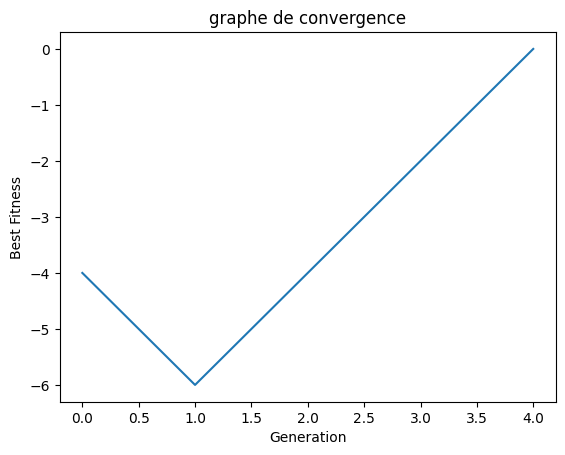

In [42]:
import matplotlib.pyplot as plt

plt.plot(fitness_list)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('graphe de convergence')
plt.show()
